# Hazard: Landslides

## Landslide class
The landslide class inherits from the hazard class and simulates landslides. 

It handles 3 different models: 
* historic landslides: historic, point-shaped event sets based on the NASA COOLR global landslide catalogue, continuously updated.
* probabilistic landslides I: UNEP_NGI - a global probabilistic ls model, based on data from the Norwegian Geotechnical Institute (NGI) for UNEP GRID, last improved 2018.
* (NASA_nowcasting (not recommended): NASA - a global probabilistic ls model based on NASA landslide nowcasting, continously updated (monthly and daily versions).

### historic landslide events: NASA COOLR initiative
Data from the global landslide catalogue is continuously updated as part of the Cooperative Open Online Landslide Repository (https://pmm.nasa.gov/landslides/coolrdata.html#download). Therefore, the most recent version of the dataset should always be downloaded by going to the link > "Open Landslide Viewer" (takes some time to load) > click "Download the full Landslide Catalog" > selecting the "NASA Global Landslide Catalog Points (Shapefile)" for download.

The historic landslide events are then directly read into a landslide hazard set.

Download and unzip the up-to-date version. Copy the folder *nasa_global_landslide_catalog_point* to the same path as the script ("../climada_python/doc/tutorial").
If you want to save the file on a different path please change the variable `path_COOL`.

In [2]:
# How to make this work for everyone?
import sys
sys.path.append("/home/jan/programing/Git/Climada/climada_python/")

In [3]:
# Loading packages!
%matplotlib inline
from climada.hazard import Hazard
from climada.hazard import landslide
from climada.hazard.landslide import Landslide
import os

2020-07-09 13:49:55,801 - climada - DEBUG - Loading default config file: /home/jan/programing/Git/Climada/climada_python/climada/conf/defaults.conf


/home/jan/programing/Git/Climada/climada_python/climada/util/plot.py:311: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


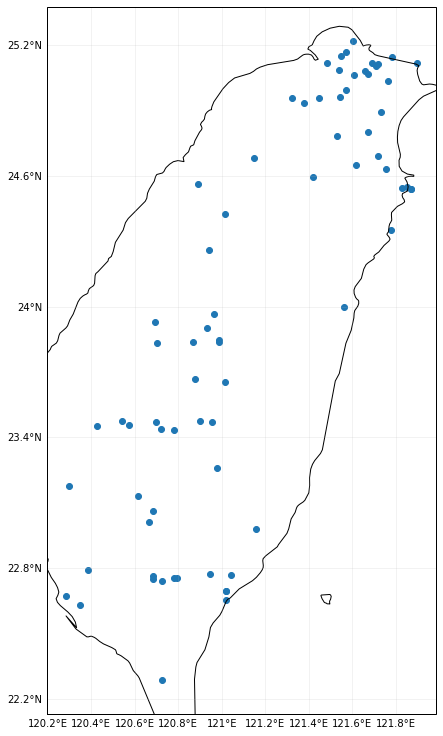

In [4]:
# Read into Landslide hazard set:
haz_ls_Taiwan_hist = Landslide()
path_COOLR = os.path.join(os.getcwd(), "nasa_global_landslide_catalog_point")
haz_ls_Taiwan_hist.set_ls_model_hist(bbox=[25.5, 122.0, 21.0, 119.5], path_sourcefile = path_COOLR, check_plots=1)

In [5]:
from climada.entity import Exposures, Entity, LitPop
from climada.entity import ImpactFuncSet, ImpactFunc
from climada.engine import Impact
import numpy as np

### create Impact function
Impact functions relate the hazard intensity to a percentage of damage in the exposure. Every hazard and exposure type are characterized by an impact function.  
mdd: mean impact degree for each intensity (numbers in [0,1])  
paa: percentage of affected assets (exposures) for each intensity (numbers in [0,1])  
mdr: mean damage ratio (mdr = paa * mdd) of the exposure at each point  
  
In this LS tutorial the Intensity for all LS is set to 1, therefore the Impact is always 100%.

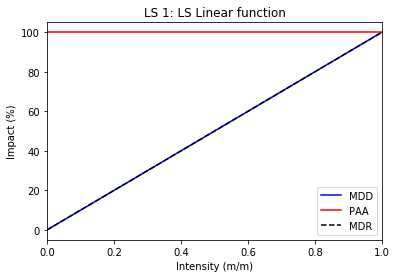

In [6]:
# Set impact function (see tutorial climada_entity_ImpactFuncSet)
if_LS_hist = ImpactFunc() 
if_LS_hist.haz_type = 'LS'
if_LS_hist.id = 1
if_LS_hist.name = 'LS Linear function'
if_LS_hist.intensity_unit = 'm/m'
if_LS_hist.intensity = np.linspace(0, 1, num=15)
if_LS_hist.mdd = np.sort(np.linspace(0, 1, num=15))
if_LS_hist.paa = np.sort(np.linspace(1, 1, num=15))
if_LS_hist.check()
if_LS_hist.plot()
ifset_LS_hist = ImpactFuncSet()
ifset_LS_hist.append(if_LS_hist)

### create Exposure
Exposure can describe the geographical distribution of people, livelihoods and assets or infrastructure; all items potentially exposed to hazards. It is represented in the class `Exposures`, which is a [GeoDataFrame](https://geopandas.readthedocs.io/en/latest/data_structures.html#geodataframe) of Python's library [geopandas](https://geopandas.readthedocs.io/en/latest/gallery/cartopy_convert.html).
This LS tutorial uses the LitPop class, which models countries' gridded asset exposure by disaggregating a macroeconomic indicator (e.g. total asset value or GDP) proportional to the product of night light intensities ("Lit") and gridded population count ("Pop") per country.  
  
The LitPop model checks for the population density data. If the data is missing follow the instructions from the raised error message. 

In [8]:
# Set exposure: (see tutorial climada_entity_LitPop)
exp_LS_hist = LitPop()
exp_LS_hist.set_country('Taiwan', reference_year = 2020)
exp_LS_hist.set_geometry_points()
exp_LS_hist.rename({'if_': 'if_LS'}, axis='columns')
exp_LS_hist = Exposures(exp_LS_hist)
exp_LS_hist.set_lat_lon()
exp_LS_hist.check()

2020-07-09 13:50:14,705 - climada.entity.exposures.litpop - INFO - Generating LitPop data at a resolution of 30.0 arcsec.
2020-07-09 13:50:33,873 - climada.entity.exposures.gpw_import - INFO - GPW Version v4.11
2020-07-09 13:50:50,068 - climada.util.finance - WARNING - No data available for country. Using non-financial wealth instead
2020-07-09 13:50:51,090 - climada.util.finance - INFO - GDP TWN 2016: 1.127e+12.
2020-07-09 13:50:52,011 - climada.entity.exposures.litpop - INFO - Creating the LitPop exposure took 38 s
2020-07-09 13:50:52,012 - climada.entity.exposures.base - INFO - Hazard type not set in if_
2020-07-09 13:50:52,013 - climada.entity.exposures.base - INFO - centr_ not set.
2020-07-09 13:50:52,013 - climada.entity.exposures.base - INFO - deductible not set.
2020-07-09 13:50:52,015 - climada.entity.exposures.base - INFO - cover not set.
2020-07-09 13:50:52,015 - climada.entity.exposures.base - INFO - category_id not set.
2020-07-09 13:50:52,016 - climada.entity.exposures.ba

2020-07-09 13:52:16,058 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


/home/jan/programing/Git/Climada/climada_python/climada/util/plot.py:311: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


2020-07-09 13:52:37,941 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


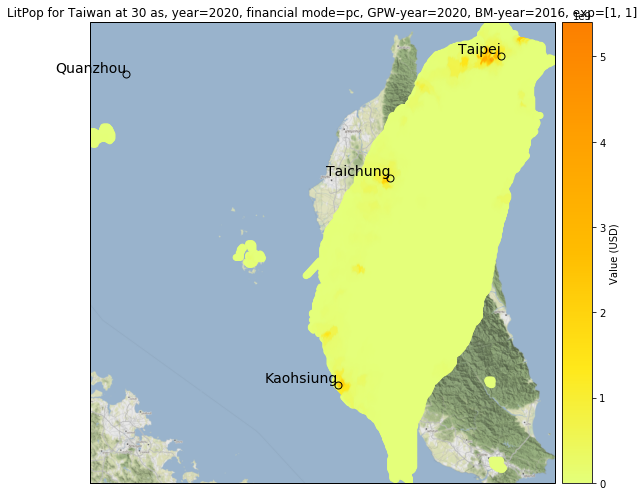

In [9]:
# plot the exposure (currently the background map is upside down)
exp_LS_hist.plot_basemap()

In [11]:
# Set Entity    
ent_LS_hist = Entity()
ent_LS_hist.exposures = exp_LS_hist
ent_LS_hist.impact_funcs = ifset_LS_hist

### Impact
The Exposure and Hazard are combined to calculate the Impact. The Hazard set contains all the recorded LS from the NASA COOLR landslide catalogue.

2020-07-09 13:53:24,807 - climada.entity.exposures.base - INFO - Matching 46165 exposures with 73 centroids.
2020-07-09 13:53:25,278 - climada.util.interpolation - WARNING - Distance to closest centroid is greater than 1km for 45902 coordinates.
2020-07-09 13:53:25,283 - climada.engine.impact - INFO - Calculating damage for 263 assets (>0) and 73 events.
2020-07-09 13:53:25,284 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_LS. Using impact functions in if_.
2020-07-09 13:53:25,305 - climada.util.coordinates - INFO - Raster from resolution 0.008333333333240489 to 0.008333333333240489.


/home/jan/programing/Git/Climada/climada_python/climada/util/plot.py:311: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


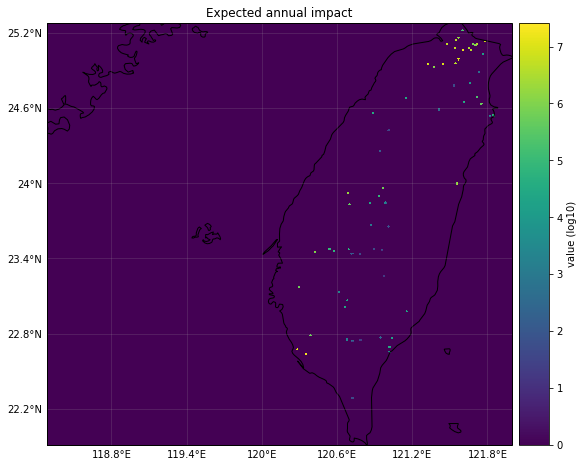

In [12]:
# Impact from historic landslides, with exposure and impact function defined as above.
imp_LS_Taiwan_hist = Impact()
imp_LS_Taiwan_hist.calc(ent_LS_hist.exposures, ent_LS_hist.impact_funcs, haz_ls_Taiwan_hist)
imp_LS_Taiwan_hist.plot_raster_eai_exposure()

### probabilistic landslide model I: UNEP_NGI

The logic of this model follows in three steps:
1. Retrieving global data on likelihood of hazard occurrence
2. Converting probabilities to binary events for a specified time period.
3. Calculating the impact

The global dataset is provided publicly by UNEP GRID and was developed by the Norwegian Geotechnical Institute (NGI); see https://preview.grid.unep.ch/index.php?preview=data&events=landslides&evcat=2&lang=eng for details. It has units of expected annual probability and percentage of pixel of occurrence of a potentially destructive landslide event x 1000000 and includes an estimate of the annual frequency of landslide triggered by precipitations. It depends on the combination of trigger and susceptibility defined by six parameters: slope factor, lithological (or geological) conditions, soil moisture condition, vegetation cover, precipitation and seismic conditions.

For the CLIMADA hazard set, the occurrence probabilities for each pixel of the raw dataset are converted into binary events. Where a landslide occurs is determined  based on a binomial distribution with p = probability of LS occurrence in the respective pixel and n = number of years in the simulation.

In [1]:
import sys
sys.path.append("/home/jan/programing/Git/Climada/climada_python/")

In [2]:
# Loading packages
%matplotlib inline
from climada.hazard import Hazard
from climada.hazard import cor_landslide
from climada.hazard.landslide import Landslide
import os

2020-07-09 14:05:25,800 - climada - DEBUG - Loading default config file: /home/jan/programing/Git/Climada/climada_python/climada/conf/defaults.conf


2020-07-09 14:05:28,537 - climada.util.coordinates - INFO - Reading /home/jan/programing/Git/Climada/climada_python/data/system/ls_pr_NGI_UNEP/ls_pr.tif
2020-07-09 14:06:18,184 - climada.hazard.landslide - INFO - Generating landslides...


/home/jan/programing/Git/Climada/climada_python/climada/util/plot.py:311: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


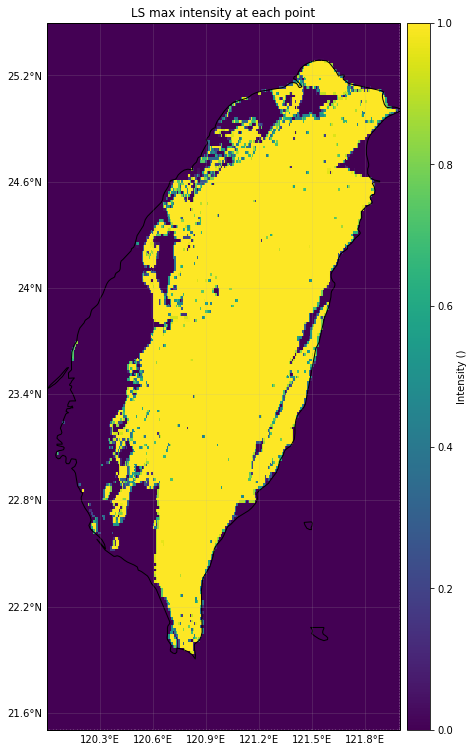

In [3]:
haz_ls_Taiwan_prob_I = Landslide()
haz_ls_Taiwan_prob_I.set_ls_model_prob(ls_model = "UNEP_NGI", bbox=[25.5, 122.0, 21.5, 120.0], n_years = 500, check_plots=1)

When putting *incl_neighbour=True* and a corresponding *max_dist = (dist in metres)*, the model also counts the neighbouring pixels up to the max_dist as affected, scaled down linearly.

In [ ]:
haz_ls_Taiwan_prob_I_neighbours = Landslide()
# The following calculation may take a while (few minutes)
haz_ls_Taiwan_prob_I_neighbours.set_ls_model_prob(n_years = 500, ls_model = "UNEP_NGI", bbox=[25.5, 122.0, 21.5, 120.0], incl_neighbour = True, max_dist = 1000, check_plots=1)

2020-07-09 13:55:54,050 - climada.util.coordinates - INFO - Reading /home/jan/programing/Git/Climada/climada_python/data/system/ls_pr_NGI_UNEP/ls_pr.tif
2020-07-09 13:56:40,626 - climada.hazard.landslide - INFO - Generating landslides...
2020-07-09 13:56:40,654 - climada.hazard.landslide - INFO - Finding neighbouring pixels...
2020-07-09 13:56:40,655 - climada.hazard.centroids.centr - INFO - Setting geometry points.


Step 3:
With the hazard set defined, it is now possible to calculate the expected damage for the simulated period:

In [4]:
from climada.entity import Exposures, Entity, LitPop
from climada.entity import ImpactFuncSet, ImpactFunc
from climada.engine import Impact
import numpy as np

2020-07-09 14:07:38,542 - climada.entity.exposures.litpop - INFO - Generating LitPop data at a resolution of 30.0 arcsec.
2020-07-09 14:07:57,484 - climada.entity.exposures.gpw_import - INFO - Reference year: 2019. Using nearest available year for GWP population data: 2020
2020-07-09 14:07:57,484 - climada.entity.exposures.gpw_import - INFO - GPW Version v4.11
2020-07-09 14:08:12,681 - climada.util.finance - WARNING - No data available for country. Using non-financial wealth instead
2020-07-09 14:08:13,943 - climada.util.finance - INFO - GDP TWN 2016: 1.127e+12.
2020-07-09 14:08:14,876 - climada.entity.exposures.litpop - INFO - Creating the LitPop exposure took 37 s
2020-07-09 14:08:14,877 - climada.entity.exposures.base - INFO - Hazard type not set in if_
2020-07-09 14:08:14,877 - climada.entity.exposures.base - INFO - centr_ not set.
2020-07-09 14:08:14,878 - climada.entity.exposures.base - INFO - deductible not set.
2020-07-09 14:08:14,879 - climada.entity.exposures.base - INFO - co

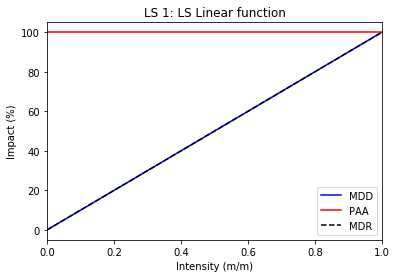

In [5]:
# Set impact function
if_LS_prob = ImpactFunc() 
if_LS_prob.haz_type = 'LS'
if_LS_prob.id = 1
if_LS_prob.name = 'LS Linear function'
if_LS_prob.intensity_unit = 'm/m'
if_LS_prob.intensity = np.linspace(0, 1, num=15)
if_LS_prob.mdd = np.sort(np.linspace(0, 1, num=15))
if_LS_prob.paa = np.sort(np.linspace(1, 1, num=15))
if_LS_prob.check()
if_LS_prob.plot()
ifset_LS_prob = ImpactFuncSet()
ifset_LS_prob.append(if_LS_prob)

# Set exposure:
exp_LS_prob = LitPop()
exp_LS_prob.set_country('Taiwan', reference_year = 2019)
exp_LS_prob.set_geometry_points()
exp_LS_prob.rename({'if_': 'if_LS'}, axis='columns')
exp_LS_prob = Exposures(exp_LS_prob)
exp_LS_prob.set_lat_lon()
exp_LS_prob.check()

# Set Entity    
ent_LS_prob = Entity()
ent_LS_prob.exposures = exp_LS_prob
ent_LS_prob.impact_funcs = ifset_LS_prob

2020-07-09 14:09:52,834 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.
2020-07-09 14:10:22,485 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


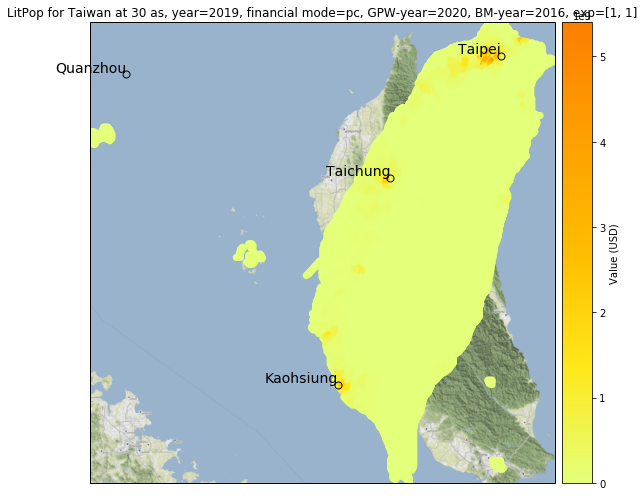

In [8]:
exp_LS_prob.plot_basemap()

In [1]:
# Set impact for probabilistic simulation incl. neighbours
imp_LS_Taiwan_prob_I = Impact()
imp_LS_Taiwan_prob_I.calc(ent_LS_prob.exposures, ent_LS_prob.impact_funcs, haz_ls_Taiwan_prob_I)
imp_LS_Taiwan_prob_I.plot_raster_eai_exposure()

NameError: name 'Impact' is not defined

Last remark: Be aware that this is the expected impact for the whole simulation period (not annually)!

### probabilistic landslide model II:  NASA nowcasting data
The logic of this model follows in five steps:
1. Retrieving global data on daily or monthly hazard situation (with hazard levels)
2. Combining files for the downloaded timespan
3. Converting hazard levels to probabilities 
4. Converting probabilities to binary events for a specified time period
5. Calculating the impact

Since these datasets are updated contiously, it makes sense to retrieve the most recent versions first and combine them into one dataset. 

Global raw data on daily hazard levels (0-2) can be downloaded for a maximum amount of 90 prior days via an API request from the PMM website of NASA (https://pmmpublisher.pps.eosdis.nasa.gov). They are constructed by combining a landslide susceptibility map (same one as used in the probabilistic model above) with 7 day up to date precipitation data. 

Global raw data exists also monthly (Jan-Dec), each containing averages over the last 15 years, combining again susceptibility and precipitation factors. They can also be downloaded with an API request from the NASA frames files website (https://svs.gsfc.nasa.gov/vis/a000000/a004600/a004631/frames/9600x5400_16x9_30p/MonthlyClimatology/ )


In [ ]:
# Daily data for the last 90 days (takes a while!! adjust start and end-time or just skip this step)
landslide.get_nowcast_tiff(tif_type = "daily", starttime = "2020-05-01", endtime = "2020-05-11", save_path = os.getcwd()+'/results/')

Once downloaded, the daily hazard maps can then be combined by merging them into one hazard map, either keeping the highest values for each pixel (operator = "maximum"), or by summing up all values of all days (operator = "sum").
The function is currently unstable; if it works (as below), the output is stored in the folder as combined_nowcasts_LS.tif.

Else, combination can be done manually in the command line:

*gdal_calc.py --outfile=combined_nowcasts_LS.tif -A "LS_first_file.tif" -B "LS_second_file.tif" --calc="sum(A,B)"*

*gdal_calc.py --outfile=combined_nowcasts_LS.tif -A "combined_nowcasts_LS.tif" -B "LS_third_file.tif" --calc="sum(A,B)"*

(do this iteratively for all files)


In [ ]:
help(landslide.combine_nowcast_tiff())

In [ ]:
# Combine by maximum (make sure LS_folder_path is the one where you just downloaded daily LS data to!)
# also this step takes a while
# if you skipped the prior step, also skip this combination step 
landslide.combine_nowcast_tiff(ls_folder_path = os.getcwd()+'/results', search_criteria = 'LS*.tif', operator = "maximum")

In [ ]:
# Plot combined daily LS nowcasts
import rasterio
from rasterio.plot import show
LS_daily_nowcast_combined = rasterio.open(os.getcwd()+'/results/' + 'combined_nowcasts_LS.tif')

# or, if you skipped the previous steps, load from demo folder:
#from climada.util.constants import DATA_DIR
#LS_daily_nowcast_combined = rasterio.open(DATA_DIR + '/demo/combined_nowcasts_daily_LS.tif')
show(LS_daily_nowcast_combined)

Same for the monthly aggregated data ...

In [ ]:
# Monthly data (Jan-Dec) averaged over the last 15 years (named [01-12]_ClimatologyMonthly_032818_9600x5400)
landslide.get_nowcast_tiff(tif_type = "monthly")


Again, if the function works, the monthly data can be combined as below (summing the files). Else, the command line command will work manually:

*gdal_calc.py --outfile=combined_nowcasts_LS.tif -A "01_ClimatologyMonthly_032818_9600x5400.tif" -B "02_ClimatologyMonthly_032818_9600x5400.tif" --calc="sum(A,B)"*

*gdal_calc.py --outfile=combined_nowcasts_LS.tif -A "combined_nowcasts_LS.tif" -B "03_ClimatologyMonthly_032818_9600x5400.tif" --calc="sum(A,B)"*

(do this iteratively unitl 12_...)

In [ ]:
# Combine monthly data by summing images (else could also be used individually to create "monthly" hazard maps!)
landslide.combine_nowcast_tiff(LS_folder_path = os.getcwd()+'/', search_criteria = '*5400.tif', operator = "sum")

In [ ]:
import rasterio
from rasterio.plot import show
LS_monthly_nowcast_combined = rasterio.open(os.getcwd()+'/combined_nowcasts_LS.tif')
show(LS_monthly_nowcast_combined)

Both the daily and the monthly hazard maps do not have probabilities of occurrence but categories. Therefore, categories first have to be converted into occurrence probabilities. For now, this is arbitrary as the highest category value is allocated an arbitrary probability (0.000015 here). It should be inquired at the NASA landslide info address what the categories refer to.
The remaining calculations are then the same as in the above probabilistic model (probability into acutal binary occurrences, formatting into climada hazard set).

In [ ]:
# Take the combined daily nowcast data as input file, 500y simulation, max prob value = 0.000015
haz_ls_Nepal_now = Landslide()
path_daily_combined = os.getcwd()+'/results/' + 'combined_nowcasts_LS.tif'
haz_ls_Nepal_now.set_LS_model(n_years = 500, ls_model = "NASA", path_sourcefile = path_daily_combined, bbox=[30, 88, 26, 80], incl_neighbour = False, max_prob = 0.000015, check_plots=1)

The impact calculation would follow exactly as demonstrated above.

Notizen Jan:
Hist:
Im hist Model gibt es einige intressante Attribute.
ls_size: attribut welches die grosse beschreibt [small, medium, large]
ls_cat: die Kategory [landslide, rock_fall, mudslide, debris_flow,...]
ls_triger: Auslöser für LS [downpour, tropycal_cyclone, freeze_thaw, ...]

Warnung: Missing exposures impact functions for hazard "if_LS" Using impact functions in "if_".
Problem: Durch ungenauigkeit sind (vermutlich) ein paar ls über Wasser (exposure = 0).
